In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from torchwisdom.metrics.callback import *
from torchwisdom.optim.callback import *
from torchwisdom.metrics import *
from torchwisdom.callback import *
from torchwisdom.statemgr.callback import StateManagerCallback
from torchwisdom.utils.data.collector import *
from torch.optim.optimizer import Optimizer
from torchwisdom.trainer import *
from torchwisdom.vision.trainer.trainer import *

from torchwisdom.vision.models import mobilenetv2
from torchwisdom.vision.trainer.trainer import *
from torchvision.datasets.mnist import MNIST
import torchvision.transforms as transforms
from torchwisdom.utils.data.collector import DatasetCollector
import torch.optim as optim
import torch.nn as nn
from torchwisdom.vision.trainer.trainer import ConvTrainer
from torchwisdom.vision.models.simplecnn import SimpleCNN
from torchvision import datasets
from torchwisdom.metrics.callback import *
from torchwisdom.vision.models import resnet


tmft = transforms.Compose([
    transforms.Resize((32,32)),
#     transforms.Grayscale(),
    transforms.ToTensor()
])

# train_path = '/data/MNIST/train'
# valid_path = '/data/MNIST/valid'
# trainset = MNIST(train_path, train=True, transform=tmft, download=False)
# validset = MNIST(valid_path, train=False, transform=tmft, download=False)

train_path = '/data/att_faces_new/train'
valid_path = '/data/att_faces_new/valid'
trainset = datasets.ImageFolder(train_path, transform=tmft)
validset = datasets.ImageFolder(valid_path, transform=tmft)

 
data = DatasetCollector(trainset, validset, batch_size=32)
model = SimpleCNN(in_chan=3, num_classes=40)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD
scheduler = StepLRCallback(step_size=2)
metric_acc = AccuracyCallback()
metric_erate = ErrorRateCallback()
trainer = ConvTrainer(data=data, model=model, optimizer=optimizer, 
                      criterion=criterion, metrics=[metric_acc, metric_erate], callbacks=[scheduler])

trainer.resumeable(True)

epoch,trn_loss,val_loss,trn_acc,val_acc,trn_error_rate,val_error_rate,time,remain
1,3.695124,3.702865,0.026620,0.020833,0.973380,0.979167,0:00:00.40,0:00:07.62
2,3.695015,3.696860,0.024306,0.020833,0.975694,0.979167,0:00:00.39,0:00:07.03
3,3.693414,3.695899,0.025463,0.031250,0.974537,0.968750,0:00:00.34,0:00:05.76
4,3.693866,3.691244,0.024306,0.020833,0.975694,0.979167,0:00:00.33,0:00:05.20


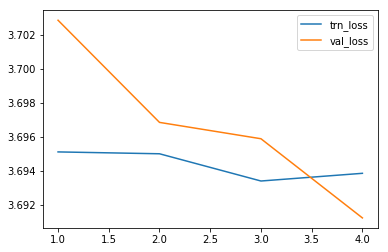

KeyboardInterrupt: 

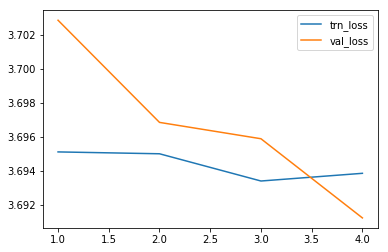

In [27]:
# trainer.freeze(last_from=-1, last_to=-6)
trainer.unfreeze()
trainer.fit(20, lr=[1e-4, 1e-3, 1e-2])

In [29]:
# import pickle
# import matplotlib
# matplotlib.use('Agg')
# trainer.resume()

In [31]:
# trainer.state_manager.dataframe()

In [53]:
img, lbl = validset.__getitem__(0)
pred = trainer.predict_single(img, readable=True)
pred

's12'

In [48]:
trainer.data.trainset.idx_to_class

AttributeError: 'ImageFolder' object has no attribute 'idx_to_class'

In [22]:
params = model.parameters()
param_groups = list(params)
if not isinstance(param_groups[0], dict):
    param_groups = [{'params': param_groups}]


In [25]:
model

SimpleCNN(
  (feature): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
  )
  (classifer): Linear(in_features=128, out_features=40, bias=True)
)

In [37]:
import torch.nn as nn

class ParameterModule(nn.Module):
    "Register a lone parameter `p` in a module."
    def __init__(self, p:nn.Parameter):
        super().__init__()
        self.val = p
    
    def forward(self, x): return x
    
def children(m:nn.Module)->nn.ModuleList:
    "Get children of `m`."
    return list(m.children())

def num_children(m:nn.Module)->int:
    "Get number of children modules in `m`."
    return len(children(m))

def children_and_parameters(m:nn.Module):
    "Return the children of `m` and its direct parameters not registered in modules."
    children = list(m.children())
    children_p = sum([[id(p) for p in c.parameters()] for c in m.children()],[])
    for p in m.parameters():
        if id(p) not in children_p: children.append(ParameterModule(p))
    return children

flatten_model = lambda m: sum(map(flatten_model,children_and_parameters(m)),[]) if num_children(m) else [m]

In [40]:
# flatten_model(mobilenetv2())

In [47]:
conv = nn.Conv2d(1,1, kernel_size=3)
params = list(conv.parameters())
params

[Parameter containing:
 tensor([[[[ 0.1499, -0.1805,  0.0106],
           [-0.1447, -0.2285,  0.0038],
           [ 0.2069,  0.3150, -0.0139]]]], requires_grad=True),
 Parameter containing:
 tensor([0.2263], requires_grad=True)]

In [49]:
list(conv.named_parameters())

[('weight', Parameter containing:
  tensor([[[[ 0.1499, -0.1805,  0.0106],
            [-0.1447, -0.2285,  0.0038],
            [ 0.2069,  0.3150, -0.0139]]]], requires_grad=True)),
 ('bias', Parameter containing:
  tensor([0.2263], requires_grad=True))]

In [68]:
named_params = list(mobilenetv2().named_parameters())

In [73]:
ln = len(named_params)
print(ln)
name = named_params[0][0]
param = named_params[0][1]

158


In [16]:
image_batch1 = torch.rand(16,3,32,32)
image_batch2 = torch.rand(16,3,32,32)

cat1 = torch.cat([image_batch1, image_batch2], dim=0)
cat1.shape

cat2 = torch.cat([image_batch1, image_batch2], dim=1)
cat2.shape

torch.Size([16, 6, 32, 32])

In [15]:
import torch
import torch.nn as nn
conv = nn.Conv2d(1,1, kernel_size=1)
# conv.weight.shape
conv.bias.shape
# conv.weight.data = torch.FloatTensor([[[0.1]]])


torch.Size([1])

In [16]:
def test(*args):
    print(args)
    
mylist = [5,3,32,32]

test(*mylist)

(5, 3, 32, 32)


In [18]:
torch.mean(-1)

TypeError: mean(): argument 'input' (position 1) must be Tensor, not int

In [50]:
x = torch.rand(1,1,1)

In [52]:
x

tensor([[[0.7371]]])

In [55]:
x.view(x.shape, -1).mean(-3)

tensor([[0.7371]])

In [12]:
!pip install request

  Stored in directory: /home/nunenuh/.cache/pip/wheels/30/84/5f/484cfba678967ef58c16fce6890925d5c7172622f20111fbfd
  Stored in directory: /home/nunenuh/.cache/pip/wheels/c1/e3/c1/d02c8c58538853e4c9b78cadb74f6d5c5c370b48a69a7271aa
  Stored in directory: /home/nunenuh/.cache/pip/wheels/c3/c3/24/b5c132b537ab380c02d69e6bd4dec1f5db56b5fe19030473d7
  Stored in directory: /home/nunenuh/.cache/pip/wheels/d6/a4/78/01b20a9dc224dcc009fab669f7f27b943b8889c5150bd68d8a
  Stored in directory: /home/nunenuh/.cache/pip/wheels/23/7c/6e/f5b4e09d6596c8b8802b347e48f149031e2363368048f1347a
Successfully built request get post query-string public


In [13]:
import request

Type:        module
String form: <module 'request' from '/opt/anaconda3/envs/prodwork/lib/python3.7/site-packages/request/__init__.py'>
File:        /opt/anaconda3/envs/prodwork/lib/python3.7/site-packages/request/__init__.py
Source:     
#!/usr/bin/env python
from get import GET
from post import POST

__all__ = ["REQUEST"]


def _request():
    kwargs = dict()
    kwargs.update(GET)
    kwargs.update(POST)
    return kwargs


REQUEST = _request()


In [17]:
!pip install requests

In [18]:
import requests

In [26]:
res = requests.get("https://api.github.com/users/nunenuh")
res.json()

{'login': 'nunenuh',
 'id': 901090,
 'node_id': 'MDQ6VXNlcjkwMTA5MA==',
 'avatar_url': 'https://avatars3.githubusercontent.com/u/901090?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/nunenuh',
 'html_url': 'https://github.com/nunenuh',
 'followers_url': 'https://api.github.com/users/nunenuh/followers',
 'following_url': 'https://api.github.com/users/nunenuh/following{/other_user}',
 'gists_url': 'https://api.github.com/users/nunenuh/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/nunenuh/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/nunenuh/subscriptions',
 'organizations_url': 'https://api.github.com/users/nunenuh/orgs',
 'repos_url': 'https://api.github.com/users/nunenuh/repos',
 'events_url': 'https://api.github.com/users/nunenuh/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/nunenuh/received_events',
 'type': 'User',
 'site_admin': False,
 'name': 'Lalu Erfandi Maula Yusnu',
 'company': 'PT. T

In [1]:
import torch

In [16]:
tt = torch.rand(2,1)
tt.unsqueeze(dim=0).size()

torch.Size([1, 2, 1])